# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pd_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pd_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [187]:
# Checking the number of mice.
pd_combined["Mouse ID"].nunique()

249

In [188]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#ADd a column that concatenates Mouse ID and Timepoint
pd_combined["Mouse Timepoint"] = pd_combined["Mouse ID"] + pd_combined["Timepoint"].astype(str)
pd_combined[pd_combined.duplicated(subset=["Mouse Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [189]:
# Optional: Get all the data for the duplicate mouse ID.
pd_combined.duplicated(subset=["Mouse ID"])

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [190]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pd_combined_clean = pd_combined.drop_duplicates(subset=["Mouse Timepoint"])

In [191]:
# Checking the number of mice in the clean DataFrame.
pd_combined_clean["Mouse ID"].nunique()

249

In [192]:
pd_combined_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


## Summary Statistics

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pd_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [194]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean_df = pd_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median_df = pd_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_std_dev_df = pd_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem_df = pd_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
combined_df = pd.DataFrame({
    "Mean": drug_mean_df,
    "Median": drug_median_df,
    "Standard Deviation": drug_std_dev_df,
    "SEM": drug_sem_df
})

combined_df.head().sort_values(by="SEM", ascending=False)

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Infubinol,52.884795,51.820584,6.567243,0.492236
Ceftamin,52.591172,51.776157,6.268188,0.469821
Capomulin,40.675741,41.557809,4.994774,0.329346


In [195]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pd_combined_clean.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


## Bar and Pie Charts

<Axes: title={'center': 'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen'>

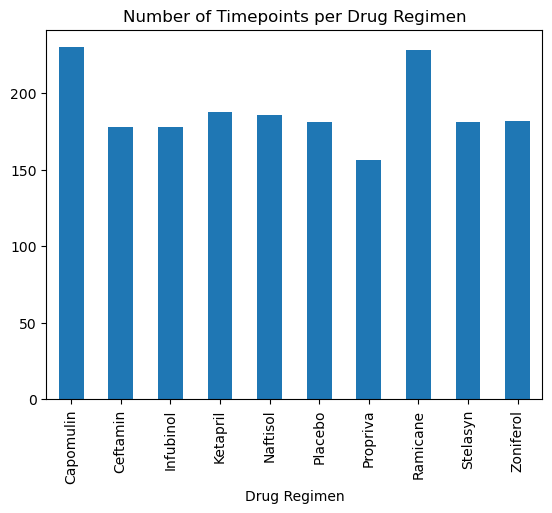

In [196]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_combined_clean.groupby("Drug Regimen")["Mouse Timepoint"].count().plot(kind="bar", title="Number of Timepoints per Drug Regimen")

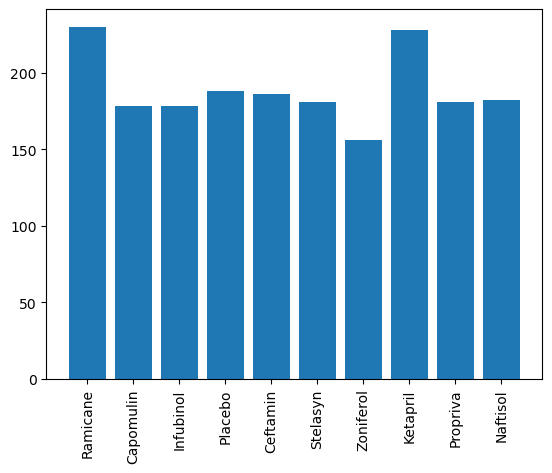

In [197]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(pd_combined_clean["Drug Regimen"].unique(), pd_combined_clean.groupby("Drug Regimen")["Mouse Timepoint"].count())
plt.xticks(rotation=90)
plt.show()

In [198]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = pd_combined_clean.drop_duplicates(subset=["Mouse ID"], keep='first')
unique_mice.head()
sex_counts = unique_mice['Sex'].value_counts()

([<matplotlib.patches.Wedge at 0x28eddc31390>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

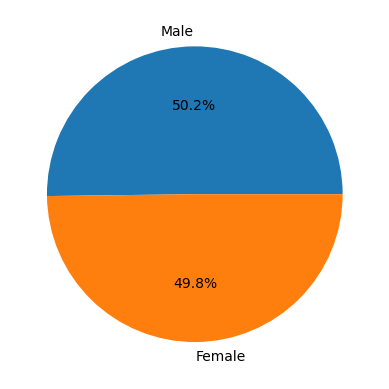

In [199]:
# Make the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [200]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint = pd_combined_clean.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_combined = latest_timepoint.reset_index().merge(pd_combined_clean, on=["Mouse ID", "Timepoint"], how="left")

In [201]:
new_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Mouse Timepoint
0,a203,45,Infubinol,Female,20,23,67.973419,2,a20345
1,a251,45,Infubinol,Female,21,25,65.525743,1,a25145
2,a262,45,Placebo,Female,17,29,70.717621,4,a26245
3,a275,45,Ceftamin,Female,20,28,62.999356,3,a27545
4,a366,30,Stelasyn,Female,16,29,63.440686,1,a36630


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = new_combined['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
Q1 = new_combined["Tumor Volume (mm3)"].quantile(0.25)
Q3 = new_combined["Tumor Volume (mm3)"].quantile(0.75)
iqr = Q3 - Q1
# Locate the rows which contain mice on each drug and get the tumor volumes

grouped_tumor_volumes = new_combined.groupby('Drug Regimen')['Tumor Volume (mm3)']

# To get the tumor volumes for each drug regimen
for drug, volumes in grouped_tumor_volumes:
    print(f"Drug: {drug}")
    print(volumes)

    # Determine outliers using upper and lower bounds
lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)

Drug: Capomulin
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
Drug: Ceftamin
3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64
Drug: Infubinol
0      67.973419
1   

<Axes: title={'center': 'Tumor Volume by Drug Regimen'}>

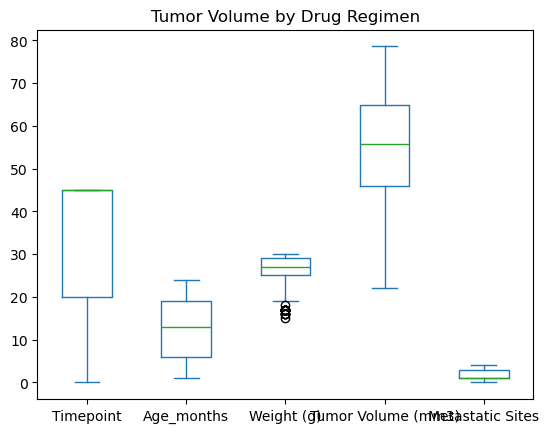

In [203]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
new_combined.plot(kind='box', title="Tumor Volume by Drug Regimen")

## Line and Scatter Plots

C:\Users\PC\AppData\Local\Temp\ipykernel_11080\1827721799.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capomulin_data = new_combined[(pd_combined_clean['Drug Regimen'] == 'Capomulin') & (pd_combined_clean['Mouse ID'] == mouse_id)]


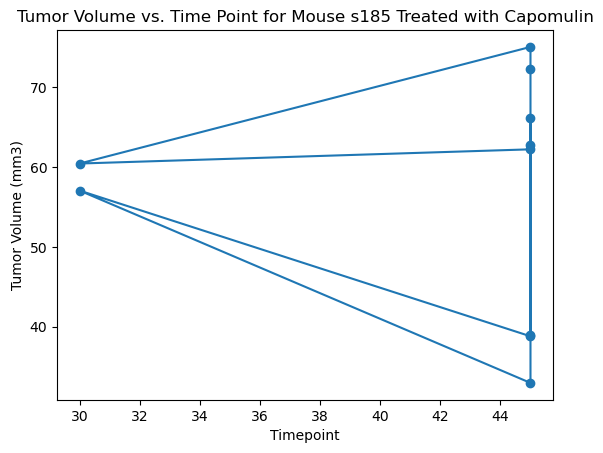

In [204]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
capomulin_data = new_combined[(pd_combined_clean['Drug Regimen'] == 'Capomulin') & (pd_combined_clean['Mouse ID'] == mouse_id)]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')

plt.show()

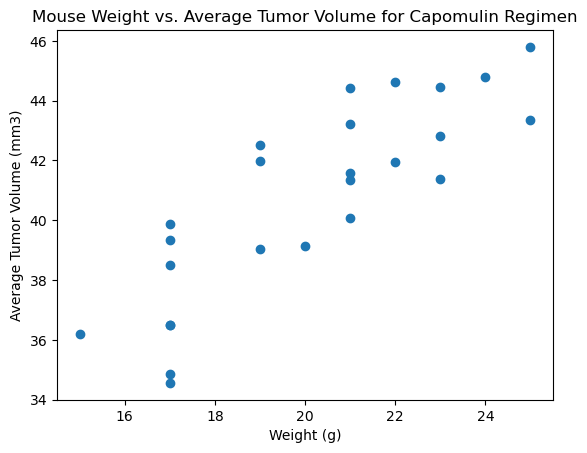

In [205]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = pd_combined_clean[pd_combined_clean['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


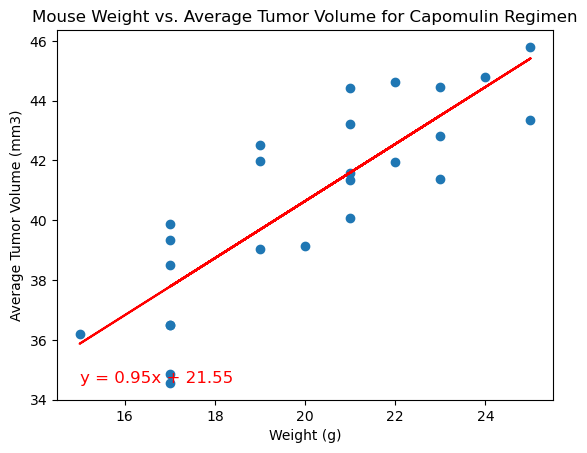

Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


In [206]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

regress_values = merged_data['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], regress_values, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.annotate(line_eq, (merged_data['Weight (g)'].min(), merged_data['Tumor Volume (mm3)'].min()), fontsize=12, color='red')


plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")